In [4]:
import gridmet_cfsv2 as gm
import grd2shp_xagg
import geopandas as gpd
import numpy as np
import time
import xagg as xa
import pickle

gm_vars = ['air_temperature',
           'air_temperature',
           'precipitation_amount',
           'specific_humidity']
m = gm.Gridmet(type=3)

In [5]:
## To save time, this block of code loads tmax into memory so the matrix of ensemble (48 ensembles) vs day 
## (30 days for each ensemble, but the ensembles are established from three seperate days of simulation so there is a need to fill in missing days)
# ds = m.tmax
# ds.load()
# day_dim = ds.dims['day']
# ds.air_temperature[0:15, 0, :, :] = ds.air_temperature[32:47, 0, :, :]
# ds.air_temperature[0:15, 1, :, :] = ds.air_temperature[16:31, 1, :, :]
# ds.air_temperature[16:31, 0, :, :] = ds.air_temperature[32:47, 0, :, :]

# ds.air_temperature[16:31, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
# ds.air_temperature[32:47, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
# ds.air_temperature[32:47, day_dim-2, :, :] = ds.air_temperature[16:31, day_dim-2, :, :]
# ds.to_netcdf('../data/tmax_full.nc')

In [6]:
import xarray as xr
ds2 = xr.open_dataset('../data/tmax_full.nc')

In [7]:
ds2.isel(time=0)

<xarray.Dataset>
Dimensions:          (day: 32, lat: 585, crs: 1, lon: 1386)
Coordinates:
  * day              (day) datetime64[ns] 2021-08-02 2021-08-03 ... 2021-09-02
  * lat              (lat) float64 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * crs              (crs) int16 3
  * lon              (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
Data variables:
    air_temperature  (day, lat, lon) float32 ...
Attributes: (12/22)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    last_permanent_slice:       0
    last_early_slice:           30
    last_provisional_slice:     24
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

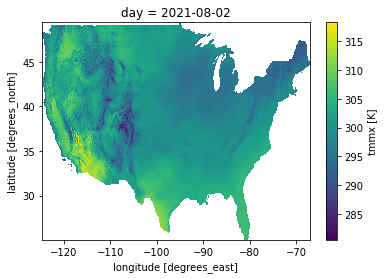

In [8]:
ds2.air_temperature.isel(time=0, day=0).plot()

In [9]:
import pickle
with open('../data/weight_gfv1_1.txt', 'rb') as file:
    agg = pickle.load(file)

In [10]:

start = time.perf_counter()
aggragated = xa.aggregate(ds2, agg)
end = time.perf_counter()
print(f'finished agg in {round(end-start, 2)} second(s)')


aggregating air_temperature...
all variables aggregated to polygons!
finished agg in 735.46 second(s)


In [11]:
aggragated.to_netcdf('../data/tmax_full_mapped_out.nc')

../data/tmax_full_mapped_out.nc saved!


In [12]:
mapped = aggragated.to_dataframe()
mapped

ValueError: Must pass 2-d input. shape=(139807, 48, 32)

In [13]:
start = time.perf_counter()
aggragated = xa.aggregate(ds2.isel(time=0), agg)
end = time.perf_counter()
print(f'finished agg in {round(end-start, 2)} second(s)')

aggregating air_temperature...
all variables aggregated to polygons!
finished agg in 547.52 second(s)


In [14]:
mapped = aggragated.to_dataframe()
mapped

,LAYER,GM_TYPE,OBJECTID,nhru_v11,hru_segme1,Shape_Leng,Shape_Area,nhm_id,hru_id_nat,Version,...,air_temperature22,air_temperature23,air_temperature24,air_temperature25,air_temperature26,air_temperature27,air_temperature28,air_temperature29,air_temperature30,air_temperature31
0,NHM\nhru_v11,Unknown Area Type,1,76127,40038,92601.509,188151328,76128,76128,1.0,...,301.740293,300.918198,301.209957,302.835931,304.785906,306.023472,306.639052,308.605753,306.550993,306.657130
1,NHM\nhru_v11,Unknown Area Type,2,76147,40038,60460.683,44161889,76148,76148,1.0,...,301.496575,300.662356,300.943264,302.603492,304.592223,305.786708,306.386561,308.357616,306.322125,306.529072
2,NHM\nhru_v11,Unknown Area Type,3,76170,40021,62333.253,73375754,76171,76171,1.0,...,301.400916,300.560641,300.848383,302.518167,304.450147,305.718173,306.328506,308.387534,306.250942,306.455833
3,NHM\nhru_v11,Unknown Area Type,3,76170,40021,62333.253,73375754,76171,76171,1.0,...,301.200012,300.399994,300.700012,302.399994,304.299988,305.399994,306.000000,308.299988,306.100006,306.399994
4,NHM\nhru_v11,Unknown Area Type,3,76170,40021,62333.253,73375754,76171,76171,1.0,...,301.200012,300.399994,300.700012,302.399994,304.299988,305.399994,306.000000,308.299988,306.100006,306.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139802,NHM\nhru_v11,Unknown Area Type,114954,57964,31028,144351.030,255074262,57965,57965,1.0,...,303.860235,303.477877,304.734888,303.954138,303.501167,303.285141,305.129717,302.331625,302.228827,296.204914
139803,NHM\nhru_v11,Unknown Area Type,114955,64080,28886,79361.920,110270903,64081,64081,1.0,...,300.996637,301.069185,300.036302,300.014018,302.215231,301.205670,298.919251,300.029777,299.415566,297.858532
139804,NHM\nhru_v11,Unknown Area Type,114956,64150,28866,95810.807,188440874,64151,64151,1.0,...,300.392765,299.835141,298.261702,297.947736,300.714401,300.255017,298.795003,299.140677,298.689291,297.175334
139805,NHM\nhru_v11,Unknown Area Type,114957,65633,31412,83210.536,73870743,65634,65634,1.0,...,301.210562,301.162428,301.961785,303.565491,304.141030,303.255721,301.270872,300.469722,299.048191,293.008848


In [15]:
gdf = gpd.read_file('../data/GFv1.1_v2e_geographic.shp')

In [16]:
gdf['temp1'] = mapped.air_temperature0.values

<AxesSubplot:>

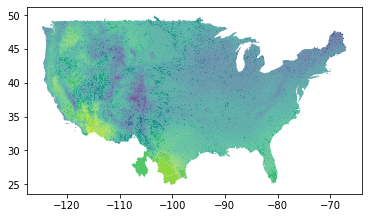

In [17]:
gdf.plot(column='temp1')

In [18]:
g2s = grd2shp_xagg.Grd2ShpXagg()

In [78]:
print(type(aggragated.agg.air_temperature))
print(aggragated.agg.air_temperature.size)
print(type(aggragated.agg.air_temperature.values))
print(type(aggragated.agg.air_temperature.values[0]))
print(type(aggragated.agg.air_temperature.values[0][0]))
print(type(aggragated.agg.air_temperature.values[0][0][0]))

<class 'pandas.core.series.Series'>
139807
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [85]:
dvar = 1
dgeom = 139807
dday = 32
test = np.zeros((dvar, dgeom, dday))

In [96]:
index = np.arange(139807)
result = map(lambda x: aggragated.agg.air_temperature.values[x][0][:], index)

In [104]:
start = time.perf_counter()
for index, value in aggragated.agg.air_temperature.items():
    test[0,index,:] = value[0]
end = time.perf_counter()
print(f'finished array in {round(end-start, 2)} second(s)')

finished array in 0.12 second(s)


In [107]:
print(test.ndim, test.shape)

3 (1, 139807, 32)
